# Pymaceuticals Inc.
---

### Analysis

- In this study, there is a relatively even distribution of males (51%) and females (49%).
- The final tumor volume for Infubinol and Ceftamin (both with median ~ 60 mm3) is much higher than Capomulin (median ~38 mm3) and Ramicane (median ~36 mm3).
- There is a strong, positive correlation between mouse weight and average tumor volume with a correlation value of 0.86. 
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [19]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = df.loc[df['Mouse ID'] == 'g989', :]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != 'g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol_mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
tumor_vol_med = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
tumor_vol_var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
tumor_vol_std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
tumor_vol_sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean,
                        'Median Tumor Volume': tumor_vol_med,
                        'Tumor Volume Variance': tumor_vol_var,
                        'Tumor Volume St. Dev.': tumor_vol_std,
                        'Tumor Volume St. Err.': tumor_vol_sem})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume St. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: >

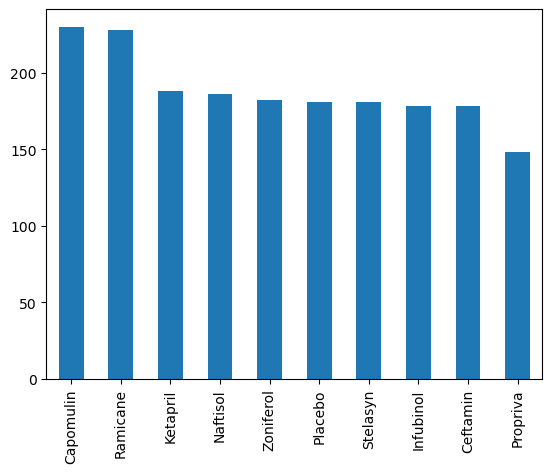

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax = clean_df['Drug Regimen'].value_counts()
ax.plot(kind = 'bar')


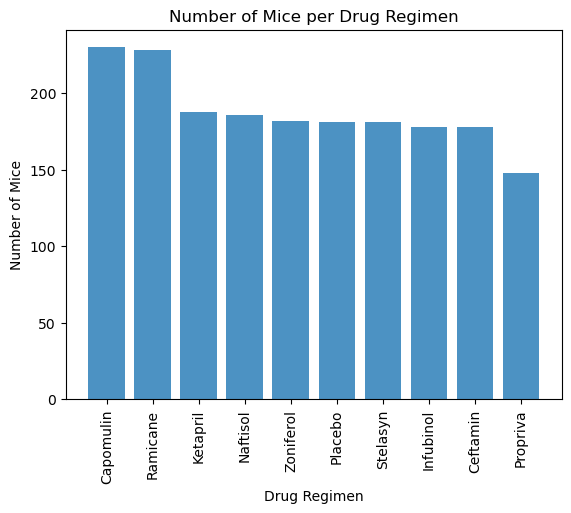

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = ax.index.values
y_axis = ax.values
#plt.figure(figsize = (20,4))
plt.bar(x_axis, y_axis, alpha=0.8)

#adding labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation = 'vertical')

plt.show()

<Axes: ylabel='Sex'>

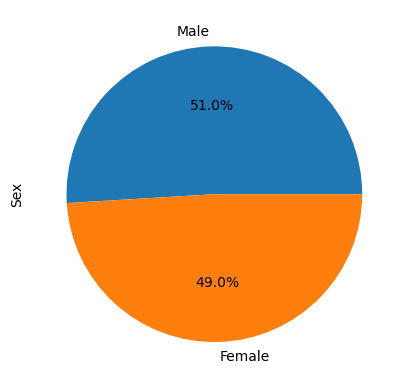

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ax2 = clean_df['Sex'].value_counts()
ax2.plot(kind = 'pie', autopct = '%.1f%%')

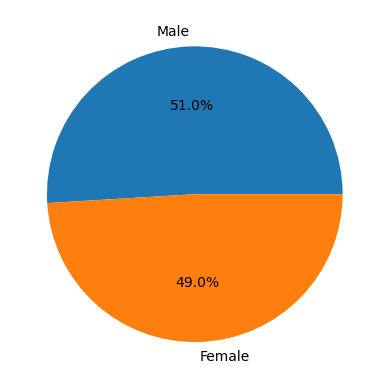

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(ax2, labels = ax2.index.values, autopct = "%.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin',:]
ram_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ramicane',:]
inf_df = clean_df.loc[clean_df['Drug Regimen'] == 'Infubinol',:]
cef_df = clean_df.loc[clean_df['Drug Regimen'] == 'Ceftamin',:]
# Start by getting the last (greatest) timepoint for each mouse

last_cap = pd.DataFrame(cap_df.groupby('Mouse ID')['Timepoint'].max())
last_ram = pd.DataFrame(ram_df.groupby('Mouse ID')['Timepoint'].max())
last_inf = pd.DataFrame(inf_df.groupby('Mouse ID')['Timepoint'].max())
last_cef = pd.DataFrame(cef_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

cap_merged = pd.merge(last_cap, clean_df, on = ['Mouse ID', 'Timepoint'])
ram_merged = pd.merge(last_ram, clean_df, on = ['Mouse ID', 'Timepoint'])
inf_merged = pd.merge(last_inf, clean_df, on = ['Mouse ID', 'Timepoint'])
cef_merged = pd.merge(last_cef, clean_df, on = ['Mouse ID', 'Timepoint'])


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Determine outliers using upper and lower bounds
def print_outliers(drug): 
    quartiles = drug.quantile([.25, .5, .75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = []
    for i in drug:
        if (i > upper_bound) or (i < lower_bound):
            outliers.append(i)
    if len(outliers) == 0:
        return(f' has no potential outliers, with bounds between {lower_bound:.2f} and {upper_bound:.2f}.')
    else:
        return(f' has potential outliers at {outliers}, with bounds between {lower_bound:.2f} and {upper_bound:.2f}.')
    
print('Capomulin' + print_outliers(cap_merged['Tumor Volume (mm3)']))
print('Ramicane' + print_outliers(ram_merged['Tumor Volume (mm3)']))
print('Infubinol' + print_outliers(inf_merged['Tumor Volume (mm3)']))
print('Ceftamin' + print_outliers(cef_merged['Tumor Volume (mm3)']))


Capomulin has no potential outliers, with bounds between 20.70 and 51.83.
Ramicane has no potential outliers, with bounds between 17.91 and 54.31.
Infubinol has potential outliers at [36.3213458], with bounds between 36.83 and 82.74.
Ceftamin has no potential outliers, with bounds between 25.36 and 87.67.


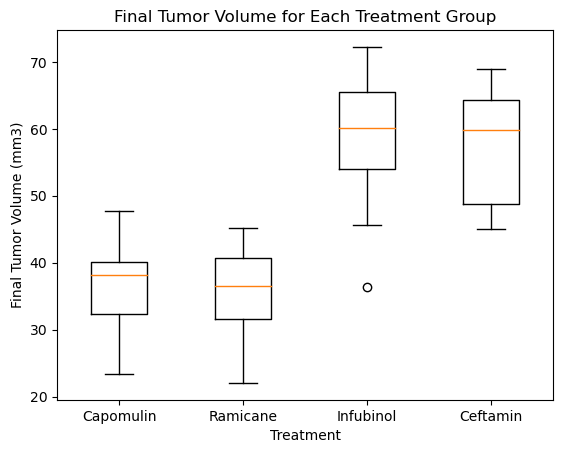

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [cap_merged['Tumor Volume (mm3)'], ram_merged['Tumor Volume (mm3)'],
        inf_merged['Tumor Volume (mm3)'], cef_merged['Tumor Volume (mm3)']]
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume for Each Treatment Group')
ax.set_xlabel('Treatment')
ax.set_ylabel('Final Tumor Volume (mm3)')

ax.boxplot(data, labels = treatments)

plt.show()

## Line and Scatter Plots

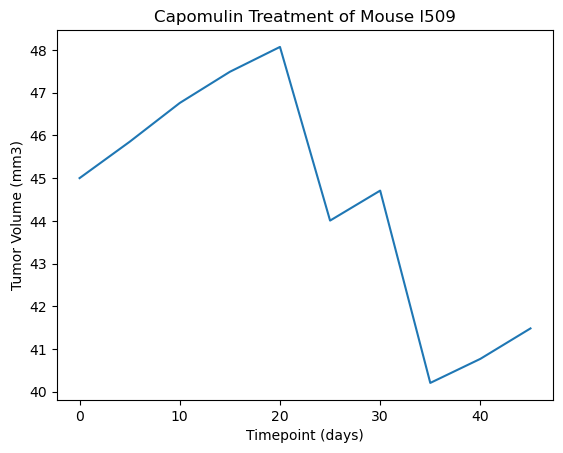

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = cap_df.loc[cap_df['Mouse ID'] == 'l509',:]
plt.plot(l509['Timepoint'], l509['Tumor Volume (mm3)'], linewidth = 1.5)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

C:\Users\alice\AppData\Local\Temp\ipykernel_28156\182088375.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter = cap_df.groupby('Mouse ID').mean()


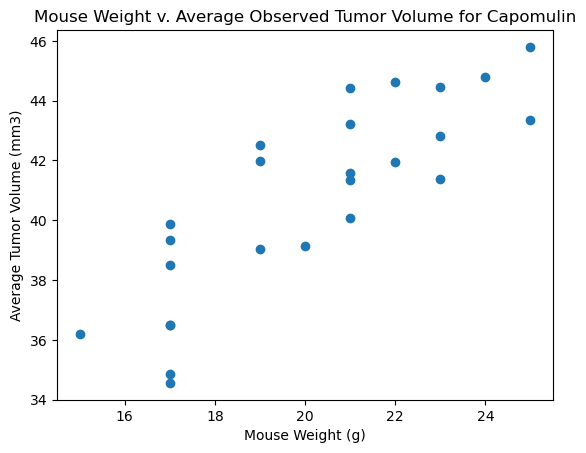

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter = cap_df.groupby('Mouse ID').mean()
plt.scatter(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])
plt.title('Mouse Weight v. Average Observed Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

 The correlation between mouse weight and avg tumor volume is 0.84


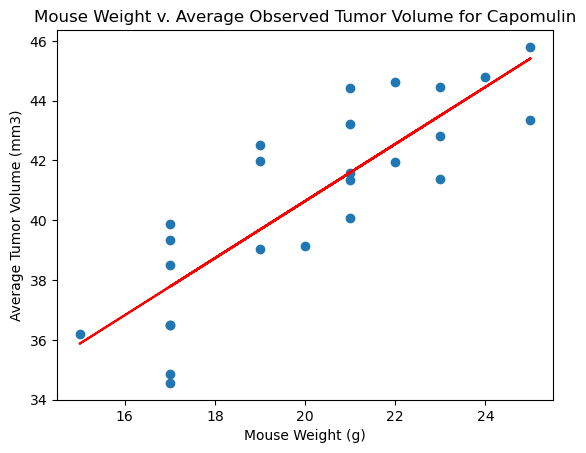

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#scatterplot
plt.scatter(scatter['Weight (g)'], scatter['Tumor Volume (mm3)'])
plt.title('Mouse Weight v. Average Observed Tumor Volume for Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

#regression line
x_values = scatter['Weight (g)']
y_values = scatter['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (5.8,0.8), fontsize = 15, color = 'red')

#correlation coefficient
corr = st.pearsonr(x_values, y_values)
print(f' The correlation between mouse weight and avg tumor volume is {round(corr[0], 2)}')